# Traffic Sign Classification using Convolutional Neural Network - LeNet


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/UK_traffic_sign_543.svg"
         alt="Real Mona Lisa"  width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Traffic Sign Classification- 
  </td></tr>
</table>

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. Images are 32 X 32 pixels
- Classes are as listed below: 
  - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
  - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
  - (4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
  - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
  - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
  - (10, b'No passing for vehicles over 3.5 metric tons')
  - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
  - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
  - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
  - (18, b'General caution') (19, b'Dangerous curve to the left')
  - (20, b'Dangerous curve to the right') (21, b'Double curve')
  - (22, b'Bumpy road') (23, b'Slippery road')
  - (24, b'Road narrows on the right') (25, b'Road work')
  - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
  - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
  - (31, b'Wild animals crossing')
  - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
  - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
  - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
  - (40, b'Roundabout mandatory') (41, b'End of no passing')
  - (42, b'End of no passing by vehicles over 3.5 metric tons')
- The network used is called LeNet that was presented by Yann LeCun http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

## Library Imports

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import os

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

print(f"Using Tensorflow version - {tf.__version__}")

Using Tensorflow version - 2.9.1


In [2]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


## Load the Datasets

In [3]:
DATASET_DIR = os.environ.get('DATASET_DIR')
PARENT_DIR = os.path.join(DATASET_DIR, "traffic-signs-data")

# Directory for training validation and test images
TRAIN_DIR = os.path.join(PARENT_DIR, "train.p")
VALIDATION_DIR = os.path.join(PARENT_DIR, "valid.p")
TEST_DIR = os.path.join(PARENT_DIR, "test.p")

# The datasets are binary files and hence loading it differently
with open(TRAIN_DIR, mode='rb') as training_data:
    train = pickle.load(training_data)

with open(VALIDATION_DIR, mode='rb') as validation_data:
    validation = pickle.load(validation_data)

with open(TEST_DIR, mode='rb') as test_data:
    test = pickle.load(test_data)

# We will view the keys of one of the dataset
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
# We will separate out train, test and validation features and labels
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = validation['features'], validation['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
# Lets check the shape of train, validation and test
print(f"Shape of Training Features : {X_train.shape}")
print(f"Shape of Training labels : {y_train.shape}")
print("\n")
print(f"Shape of Validation Features : {X_validation.shape}")
print(f"Shape of Validation labels : {y_validation.shape}")
print("\n")
print(f"Shape of Test Features : {X_test.shape}")
print(f"Shape of Test labels : {y_test.shape}")

Shape of Training Features : (34799, 32, 32, 3)
Shape of Training labels : (34799,)


Shape of Validation Features : (4410, 32, 32, 3)
Shape of Validation labels : (4410,)


Shape of Test Features : (12630, 32, 32, 3)
Shape of Test labels : (12630,)


## Visualize some images

1

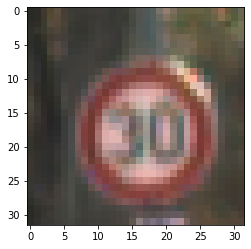

In [6]:
# Lets see the image at index 3100
index = 3100
plt.imshow(X_train[index])
y_train[index]

## Data Preparation

In [7]:
# We will shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)

# Then we will convert the images into grayscale and while we do it, we preserve the dimensions
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

# We will check the revised shape of the training features
print(f"The Shape of training features: {X_train_gray.shape}")
print(f"The Shape of validation features: {X_validation_gray.shape}")
print(f"The Shape of testing features: {X_test_gray.shape}")

The Shape of training features: (34799, 32, 32, 1)
The Shape of validation features: (4410, 32, 32, 1)
The Shape of testing features: (12630, 32, 32, 1)


In [8]:
# Now normalize the dataset
X_train_gray_norm = (X_train_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [9]:
# Check the normalised training features
X_train_gray_norm

array([[[[ 0.984375  ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [-0.55729167],
         [-0.58072917],
         [-0.56510417]],

        [[ 0.11197917],
         [ 0.02083333],
         [-0.078125  ],
         ...,
         [-0.52864583],
         [-0.58854167],
         [-0.6328125 ]],

        [[-0.37239583],
         [-0.42708333],
         [-0.47135417],
         ...,
         [-0.47395833],
         [-0.58072917],
         [-0.63020833]],

        ...,

        [[ 0.58072917],
         [ 0.5546875 ],
         [ 0.5859375 ],
         ...,
         [ 0.78645833],
         [ 0.71875   ],
         [ 0.90885417]],

        [[ 0.6875    ],
         [ 0.68229167],
         [ 0.7890625 ],
         ...,
         [ 0.6953125 ],
         [ 0.37760417],
         [ 0.83333333]],

        [[ 0.65104167],
         [ 0.42708333],
         [ 0.6640625 ],
         ...,
         [ 0.4375    ],
         [ 0.12760417],
         [ 0.77083333]]],


       [[[ 0.203125  ],


In [10]:
X_train_gray_norm.shape[1:]

(32, 32, 1)

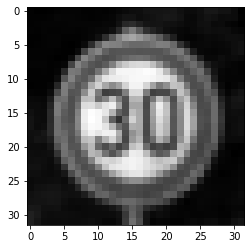

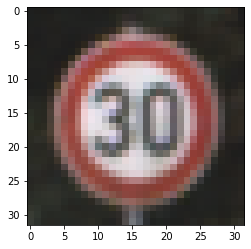

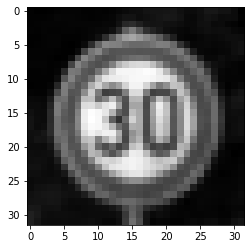

In [11]:
# Now we will visualize this image to see if any features are lost because of normalization
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

## Model Building and Training

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [12]:
# Build and Compile the model

LeNet = tf.keras.models.Sequential()

LeNet.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation=tf.keras.activations.relu, input_shape=X_train_gray_norm.shape[1:]))
LeNet.add(tf.keras.layers.AveragePooling2D())

LeNet.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation=tf.keras.activations.relu))
LeNet.add(tf.keras.layers.AveragePooling2D())

LeNet.add(tf.keras.layers.Flatten())

LeNet.add(tf.keras.layers.Dense(units=120, activation=tf.keras.activations.relu))
LeNet.add(tf.keras.layers.Dense(units=84, activation=tf.keras.activations.relu))

LeNet.add(tf.keras.layers.Dense(units=43, activation=tf.keras.activations.softmax))

# Compile the model
LeNet.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# View the model summary
LeNet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [13]:
# Lets train the model
epochs_history = LeNet.fit(X_train_gray_norm, y_train, batch_size=500, epochs=50, verbose=1, validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 3s 9ms/step - loss: 3.0688 - accuracy: 0.2038 - val_loss: 2.6192 - val_accuracy: 0.3036
Epoch 2/50
70/70 [==============================] - 0s 6ms/step - loss: 1.5752 - accuracy: 0.5643 - val_loss: 1.3516 - val_accuracy: 0.6163
Epoch 3/50
70/70 [==============================] - 0s 6ms/step - loss: 0.8994 - accuracy: 0.7461 - val_loss: 0.9726 - val_accuracy: 0.7229
Epoch 4/50
70/70 [==============================] - 0s 6ms/step - loss: 0.6640 - accuracy: 0.8158 - val_loss: 0.8556 - val_accuracy: 0.7399
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5240 - accuracy: 0.8591 - val_loss: 0.7062 - val_accuracy: 0.7907
Epoch 6/50
70/70 [==============================] - 0s 5ms/step - loss: 0.4371 - accuracy: 0.8840 - val_loss: 0.6421 - val_accuracy: 0.8052
Epoch 7/50
70/70 [==============================] - 0s 6ms/step - loss: 0.3749 - accuracy: 0.9026 - val_loss: 0.5912 - val_accuracy: 0.8163
Epoch 8/50
70/70 [==

## Evaluating Accuracy and Loss for the model

In [14]:
acc = epochs_history.history['accuracy']
val_acc = epochs_history.history['val_accuracy']
loss = epochs_history.history['loss']
val_loss = epochs_history.history['val_loss']

# Getting the number of epochs
epochs = range(len(acc))

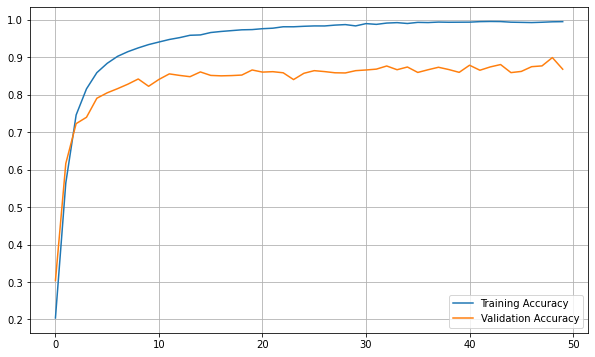

In [15]:
# Plot training and Validation accuracy by epochs

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.legend()
plt.grid(True)

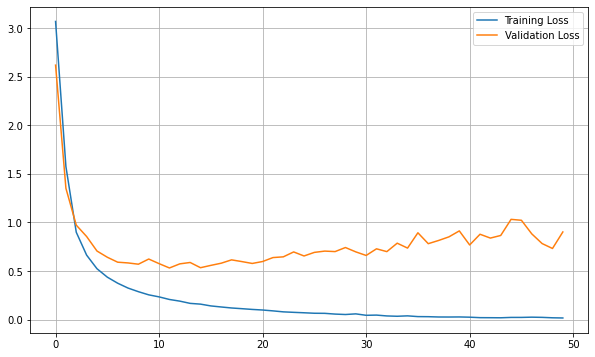

In [16]:
# Plot training and Validation Loss by epochs

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label="Validation Loss")
plt.legend()
plt.grid(True)

In [17]:
# We will run predictions using this model and come up with the test accuracy
evaluations = LeNet.evaluate(X_test_gray_norm, y_test, verbose=1)
print(f"Test Accuracy is - {evaluations[1]}")

395/395 [==============================] - 1s 3ms/step - loss: 1.1055 - accuracy: 0.8766
Test Accuracy is - 0.8766429424285889


395/395 [==============================] - 1s 2ms/step
Print the Confusion Matrix
[[ 27  31   0 ...   0   0   0]
 [  0 672  18 ...   8   0   0]
 [  0  31 666 ...   2   0   0]
 ...
 [  0   0   2 ...  49   0   0]
 [  0   0   0 ...   0  46   1]
 [  0   0   0 ...   0   6  63]]


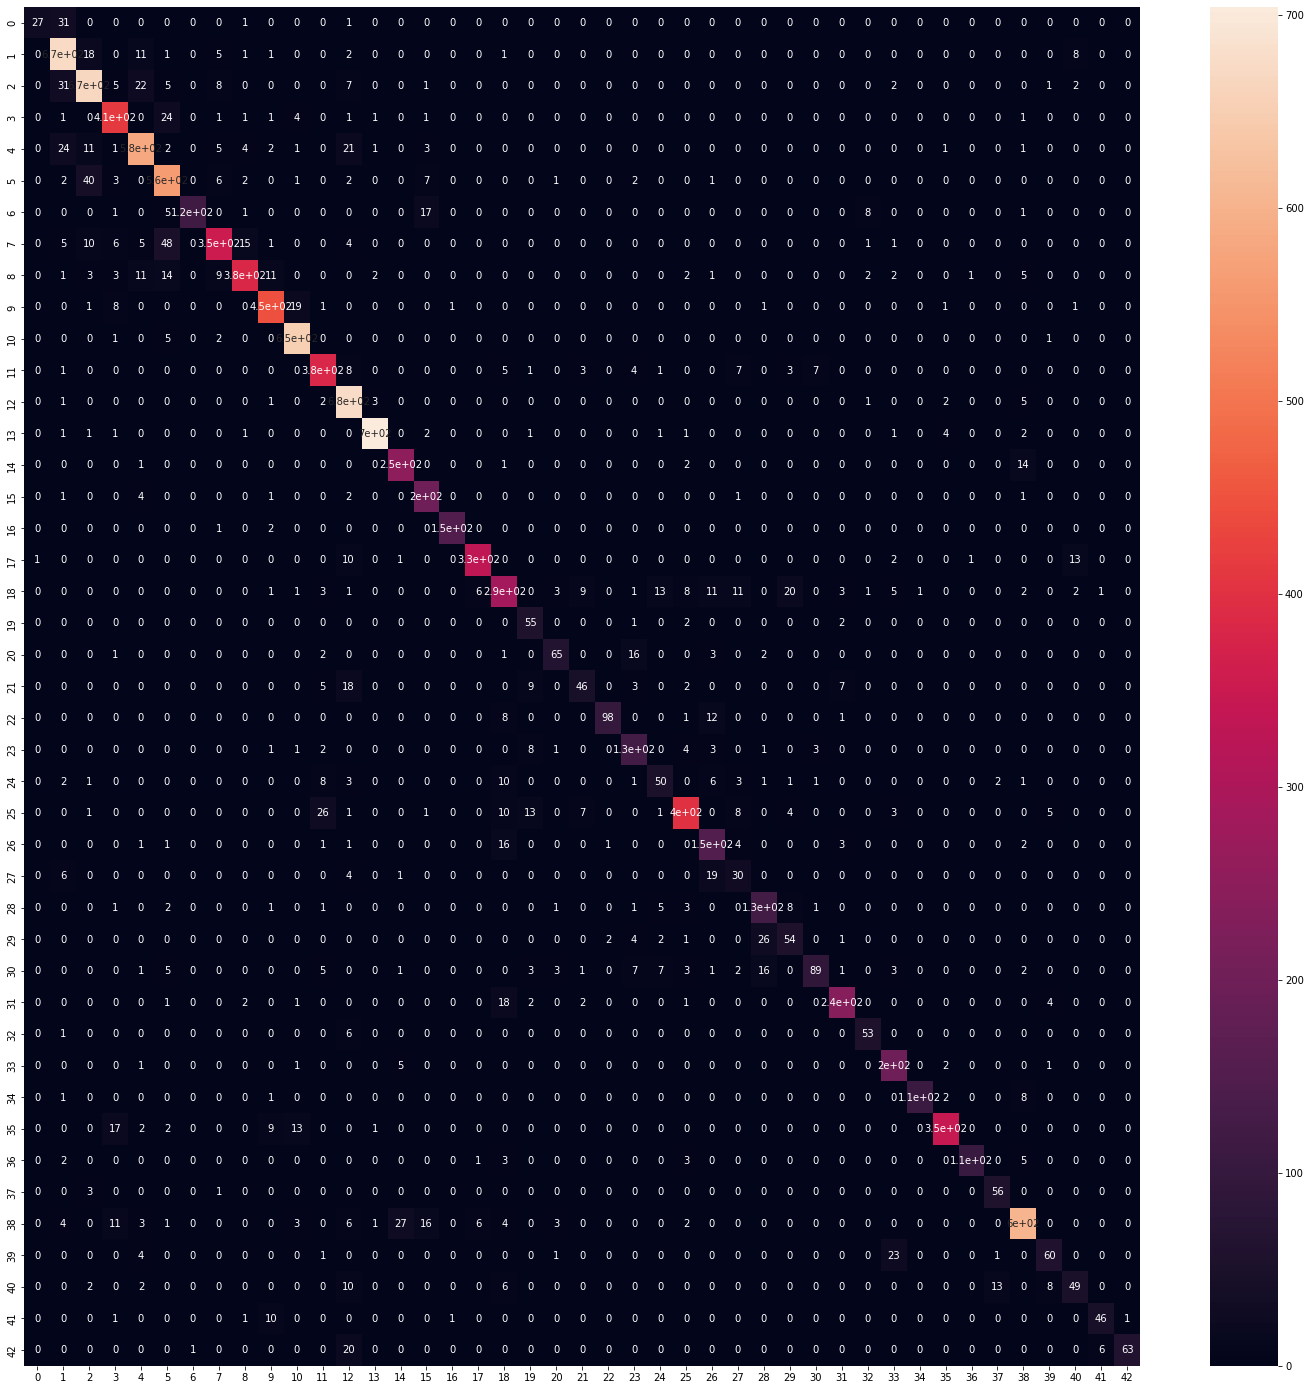

In [22]:
# Now get the predictions on the test data
predictions = LeNet.predict(X_test_gray_norm)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)

print("Print the Confusion Matrix")
print(cm)

In [23]:
# Print the classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61        60
           1       0.85      0.93      0.89       720
           2       0.88      0.89      0.88       750
           3       0.87      0.92      0.90       450
           4       0.90      0.88      0.89       660
           5       0.83      0.89      0.86       630
           6       0.99      0.78      0.87       150
           7       0.90      0.79      0.84       450
           8       0.93      0.85      0.89       450
           9       0.91      0.93      0.92       480
          10       0.94      0.99      0.96       660
          11       0.87      0.90      0.89       420
          12       0.84      0.98      0.90       690
          13       0.99      0.98      0.98       720
          14       0.88      0.93      0.90       270
          15       0.81      0.95      0.87       210
          16       0.99      0.98      0.98       150
          17       0.96    